In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import  datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r"Nat_Gas.csv")
# data['Dates'] = pd.to_datetime(data['Dates']) 
# # data.set_index('Dates', inplace=True) 
data['Dates'] = pd.to_datetime(data['Dates']) 

/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_14124/1954174909.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


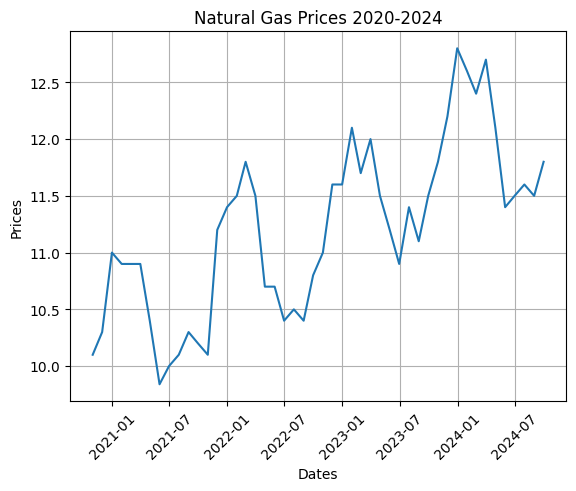

In [3]:
plt.plot(data['Dates'], data['Prices'])
plt.title('Natural Gas Prices 2020-2024')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('Prices')
plt.grid()
# 

In [4]:
data['Dates'] = pd.to_datetime(data['Dates'])
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month

Performing linear regression of a specific month of Janurary because we observe a distinct linear trend in the prices for that particular month over the years.
However, it is also important to note that this approach assume a linear relationship and may not capture more complex patterns or seasonal variations in the data

In [5]:
x = np.array(data[data['Month'] == 1]['Year']).reshape(-1, 1)
y = np.array(data[data['Month'] == 1]['Prices'])

reg = LinearRegression().fit(x, y)
reg

LinearRegression()

In [6]:
round(float(reg.predict([[2025]])[0]), 2)

13.2

In [7]:
# extrapolation for an extra year

def next_year_price(next_year):
    """Returns a predicted natural gas prices for each month in the following year"""
    
    price_list = []
    for i in np.arange(12):
        x = np.array(data[data['Month'] == 1+i]['Year']).reshape(-1, 1)
        y = np.array(data[data['Month'] == 1+i]['Prices'])
        reg = LinearRegression().fit(x, y)
        price = reg.predict([[next_year]])[0]
        price_list.append(round(float(price), 2))

    return price_list

In [8]:
gas_prices_2025 = next_year_price(2025)
np.array(gas_prices_2025)

array([13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95, 12.25, 11.9 , 12.45,
       12.85, 13.46, 13.66])

In [9]:
def get_last_of_each_month(year):
    """Returns the last day of each month in a given year"""
    dates_array = []
    current_date = dt.date(year, 12, 31) # start from the last day of the year
    while current_date.year == year:

        dates_array.append(current_date.strftime('%Y-%m-%d'))
        month = current_date.month
        year = current_date.year

        # move to the first day of the previous month
        current_date = current_date.replace(year=year, month=month, day=1)

        # move back one day to get the last day of the current month
        current_date -= dt.timedelta(days=1)
    
    return dates_array[::-1] # reverse the array to get the date in aseneding order

In [10]:
dates_2025 = get_last_of_each_month(2025)
dates_2025

['2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [11]:
# new dataframe of 2025 dates and prices
projected_gas_prices25_df = pd.DataFrame({'Dates': dates_2025, 'Prices': gas_prices_2025})
projected_gas_prices25_df

projected_gas_prices25_df['Dates'] = pd.to_datetime(projected_gas_prices25_df['Dates'])
projected_gas_prices25_df['Year'] = projected_gas_prices25_df['Dates'].dt.year
projected_gas_prices25_df['Month'] = projected_gas_prices25_df['Dates'].dt.month
projected_gas_prices25_df

,Dates,Prices,Year,Month
0,2025-01-31,13.20,2025,1
1,2025-02-28,12.80,2025,2
2,2025-03-31,13.25,2025,3
3,2025-04-30,12.65,2025,4
4,2025-05-31,12.08,2025,5
5,2025-06-30,11.95,2025,6
6,2025-07-31,12.25,2025,7
7,2025-08-31,11.90,2025,8
8,2025-09-30,12.45,2025,9
9,2025-10-31,12.85,2025,10


In [12]:
gas_df = pd.concat([data, projected_gas_prices25_df], ignore_index=True)
gas_df

,Dates,Prices,Year,Month
0,2020-10-31,10.10,2020,10
1,2020-11-30,10.30,2020,11
2,2020-12-31,11.00,2020,12
3,2021-01-31,10.90,2021,1
4,2021-02-28,10.90,2021,2
5,2021-03-31,10.90,2021,3
6,2021-04-30,10.40,2021,4
7,2021-05-31,9.84,2021,5
8,2021-06-30,10.00,2021,6
9,2021-07-31,10.10,2021,7


In [13]:
def get_gas_price(month, year):
    """Returns the natural gas price for a given month and year"""
    return gas_df[(gas_df['Month'] == month) & (gas_df['Year'] == year)]['Prices'].values[0]

In [14]:
get_gas_price(10, 2025)

12.85

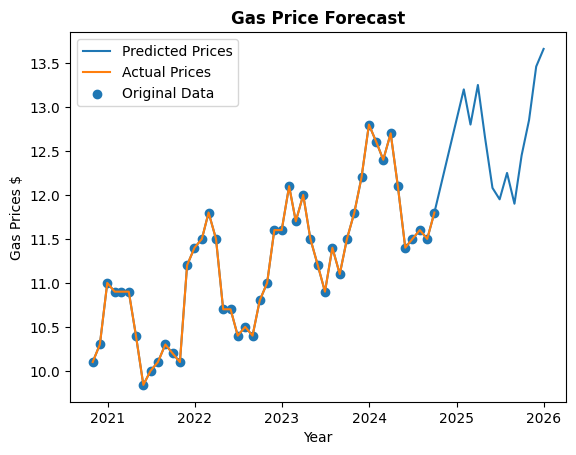

In [15]:
# Final Graphic
plt.plot(gas_df['Dates'], gas_df['Prices'], label = 'Predicted Prices')
plt.plot(data['Dates'], data['Prices'], label = 'Actual Prices')
plt.scatter(data['Dates'], data['Prices'], label='Original Data')
plt.ylabel('Gas Prices $')
plt.xlabel('Year')
plt.title('Gas Price Forecast', fontweight = 'bold')
plt.legend()

#### Different approach

In [16]:
from scipy.optimize import curve_fit

In [17]:
def linear_sin_model(x, a, b, c, d, e, f):
    """
    Combination of Linear and Sinusoidal functions

    Parameters:
        x: Input date array (in months since the start of the data)
        a, b, c: Coefficients of the linear componenet: a*x + b
        d, e, f: Coefficients of the sinusoidal component: d * sin(2*pi*(e*x + f))

    Returns:
        Predicted gas prices based on the input date array

    """
    return a * x + b + d * np.sin( 2 * np.pi * (e * x + f)) + c


In [18]:
def fit_gas_prices(dates, prices):
    """
    Fits the gas prices to the linear_sin_model

    Parameters:
        dates: Input date array (in months since the start of the data)
        prices: Input gas price array corresponding to the dates

    Returns:
        A function that can predict gas prices given new dates
    """
    # normalize the dates start from 0
    start_date = min(dates)
    normalized_dates = np.array(dates) - start_date

    # perform curve fitting to obtain the modal coefficients
    coeffs, _ = curve_fit(linear_sin_model, normalized_dates, prices)

    # Unpack the coefficients
    a, b, c, d, e, f = coeffs

    # create and return the prediction function
    def predict_gas_prices(dates):
        # normalize the input dates
        normalized_dates = np.array(dates) - start_date
        return linear_sin_model(normalized_dates, a, b, c, d, e, f)

    return predict_gas_prices

Predicted gas price for the specific date: 12.196796873459334


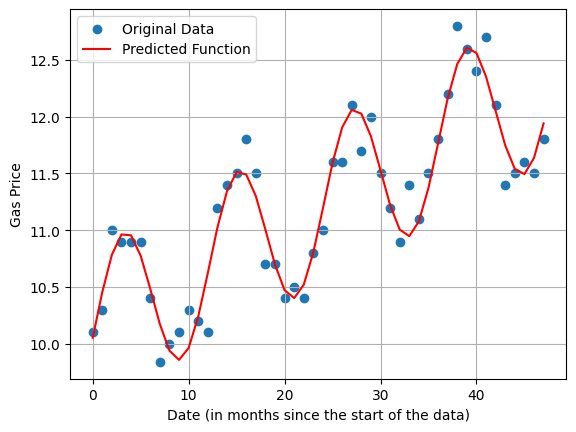

In [19]:
import matplotlib.pyplot as plt

# gas price data
dates = np.arange(len(data['Prices']))
prices = data['Prices']

# fit the gas prices
predict_gas_prices = fit_gas_prices(dates, prices)

specific_dates = len(dates) + len(np.arange(10))
predicted_prices = predict_gas_prices(specific_dates)
print('Predicted gas price for the specific date:',predicted_prices)

# plot the orginal date and predicted prices
plt.scatter(dates, prices, label='Original Data')
plt.plot(dates, predict_gas_prices(dates), color = 'red', label='Predicted Function')
plt.xlabel('Date (in months since the start of the data)')
plt.ylabel('Gas Price')
plt.legend()
plt.grid(True)
plt.show()


